# Storytelling Data Visualization on Exchange Rates

This project focuses on explanatory data visualization. We will use a dataset that includes daily Euro exchange rates with multiple different currencies, separate out the data to look only at the Euro to US Dollar exchange rate, and then make graphs to tell a story about the data.

The dataset was assembled by Daria Chemkaeva and is available on [Kaggle](https://www.kaggle.com/datasets/lsind18/euro-exchange-daily-rates-19992020). The dataset gets regular updates. The version for this project is from January 2021.

## Import Data

We begin by reading the csv file into a pandas dataframe object and perform some inspection to look at the dataset's structure.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
%matplotlib inline

exchange_rates = pd.read_csv('euro-daily-hist_1999_2020.csv')

exchange_rates.head()

,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
0,2021-01-08,1.5758,1.9558,6.5748,1.5543,1.0827,7.9184,NaN,26.163,7.4369,...,4.8708,90.8000,10.0510,1.6228,NaN,NaN,36.8480,9.0146,1.2250,18.7212
1,2021-01-07,1.5836,1.9558,6.5172,1.5601,1.0833,7.9392,NaN,26.147,7.4392,...,4.8712,91.2000,10.0575,1.6253,NaN,NaN,36.8590,8.9987,1.2276,18.7919
2,2021-01-06,1.5824,1.9558,6.5119,1.5640,1.0821,7.9653,NaN,26.145,7.4393,...,4.8720,90.8175,10.0653,1.6246,NaN,NaN,36.9210,9.0554,1.2338,18.5123
3,2021-01-05,1.5927,1.9558,6.5517,1.5651,1.0803,7.9315,NaN,26.227,7.4387,...,4.8721,91.6715,10.0570,1.6180,NaN,NaN,36.7760,9.0694,1.2271,18.4194
4,2021-01-04,1.5928,1.9558,6.3241,1.5621,1.0811,7.9484,NaN,26.141,7.4379,...,4.8713,90.3420,10.0895,1.6198,NaN,NaN,36.7280,9.0579,1.2296,17.9214


In [2]:
exchange_rates.tail()

,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
5694,1999-01-08,1.8406,NaN,NaN,1.7643,1.6138,NaN,0.58187,34.938,7.4433,...,1.3143,27.2075,9.1650,1.9537,188.8400,42.560,42.5590,0.3718,1.1659,6.7855
5695,1999-01-07,1.8474,NaN,NaN,1.7602,1.6165,NaN,0.58187,34.886,7.4431,...,1.3092,26.9876,9.1800,1.9436,188.8000,42.765,42.1678,0.3701,1.1632,6.8283
5696,1999-01-06,1.8820,NaN,NaN,1.7711,1.6116,NaN,0.58200,34.850,7.4452,...,1.3168,27.4315,9.3050,1.9699,188.7000,42.778,42.6949,0.3722,1.1743,6.7307
5697,1999-01-05,1.8944,NaN,NaN,1.7965,1.6123,NaN,0.58230,34.917,7.4495,...,1.3168,26.5876,9.4025,1.9655,188.7750,42.848,42.5048,0.3728,1.1790,6.7975
5698,1999-01-04,1.9100,NaN,NaN,1.8004,1.6168,NaN,0.58231,35.107,7.4501,...,1.3111,25.2875,9.4696,1.9554,189.0450,42.991,42.6799,0.3723,1.1789,6.9358


In [3]:
exchange_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5699 entries, 0 to 5698
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Period\Unit:              5699 non-null   object 
 1   [Australian dollar ]      5699 non-null   object 
 2   [Bulgarian lev ]          5297 non-null   object 
 3   [Brazilian real ]         5431 non-null   object 
 4   [Canadian dollar ]        5699 non-null   object 
 5   [Swiss franc ]            5699 non-null   object 
 6   [Chinese yuan renminbi ]  5431 non-null   object 
 7   [Cypriot pound ]          2346 non-null   object 
 8   [Czech koruna ]           5699 non-null   object 
 9   [Danish krone ]           5699 non-null   object 
 10  [Estonian kroon ]         3130 non-null   object 
 11  [UK pound sterling ]      5699 non-null   object 
 12  [Greek drachma ]          520 non-null    object 
 13  [Hong Kong dollar ]       5699 non-null   object 
 14  [Croatia

## Data Cleaning

Change column names and convert `Time` to contain datetime objects for ease of use.

In [4]:
exchange_rates.rename(columns={'[US dollar ]': 'US_dollar',
                               'Period\\Unit:': 'Time'},
                      inplace=True)
exchange_rates['Time'] = pd.to_datetime(exchange_rates['Time'])
exchange_rates.sort_values('Time', inplace=True)
exchange_rates.reset_index(drop=True, inplace=True)

Create a new dataset with only the date and the Euro to US Dollar exchange rate.

In [5]:
euro_to_dollar = exchange_rates[['Time', 'US_dollar']].copy()

euro_to_dollar['US_dollar'].value_counts()

-         62
1.2276     9
1.1215     8
1.1305     7
1.3532     6
          ..
1.1055     1
1.3308     1
1.4226     1
1.3759     1
1.2335     1
Name: US_dollar, Length: 3528, dtype: int64

The `US_dollar` column contains 62 rows with a value of ` - `. Let's remove these.

In [6]:
euro_to_dollar = euro_to_dollar[euro_to_dollar.US_dollar != '-']
euro_to_dollar['US_dollar'] = euro_to_dollar['US_dollar'].astype(float)


euro_to_dollar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5637 entries, 0 to 5698
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Time       5637 non-null   datetime64[ns]
 1   US_dollar  5637 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 132.1 KB


## Rolling Mean

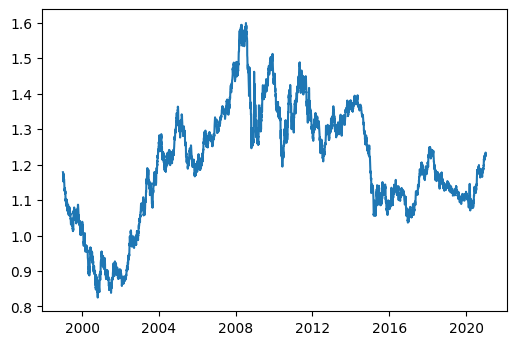

In [7]:
plt.plot(euro_to_dollar['Time'],
         euro_to_dollar['US_dollar'])
plt.show()

This graph shows all of the daily fluctuations. We will convert to a 30-day rolling average to make things easier to read.

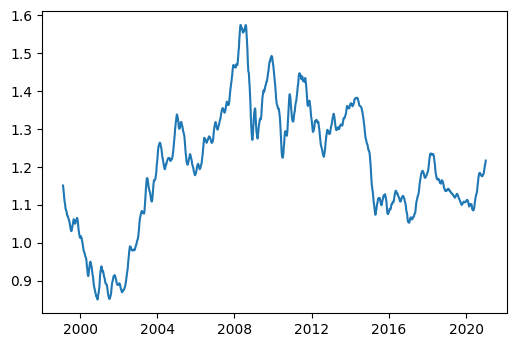

In [8]:
euro_to_dollar['rolling_mean'] = euro_to_dollar['US_dollar'].rolling(30).mean()

plt.plot(euro_to_dollar['Time'], euro_to_dollar['rolling_mean'])
plt.show()

## Explanatory Graphs

### Financial Crisis

Our first graph will look at the exchange rate during the financial crisis of 2007 and 2008.

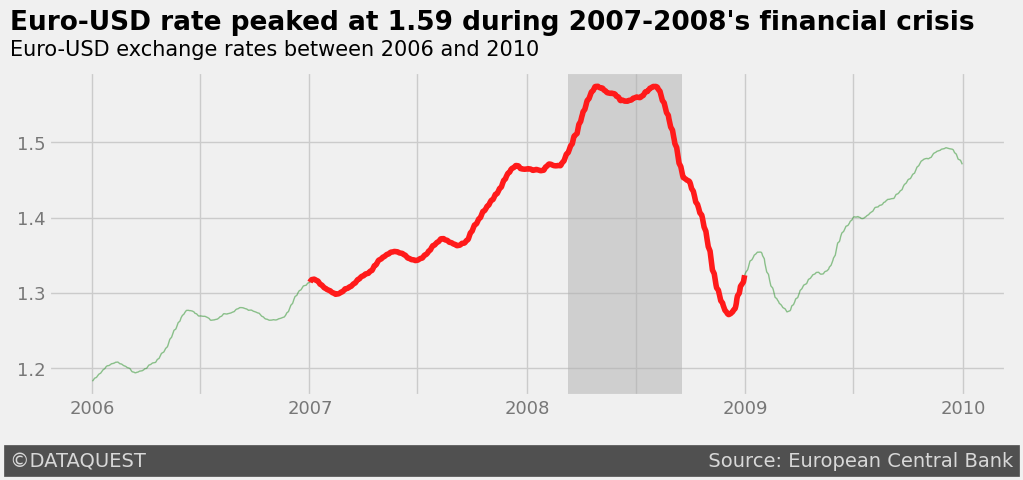

In [9]:
financial_crisis = euro_to_dollar[euro_to_dollar['Time'].dt.year.between(2006,2009)]
crisis_peak = euro_to_dollar[euro_to_dollar['Time'].dt.year.between(2007,2008)]


# Plot line graph
plt.style.use('fivethirtyeight')
fix, ax = plt.subplots(figsize=(11,4))
ax.plot(financial_crisis['Time'], financial_crisis['rolling_mean'],
        color='#248f24', lw=1, alpha=0.5)
ax.plot(crisis_peak['Time'], crisis_peak['rolling_mean'],
        color='#ff1a1a')

# Add x-axis highlight of the exchange rate peak
ax.axvspan(733110, 733300, color='#b0b0b0', alpha=0.5)

# Create custom x-axis and y-axis labels
ax.set_xticklabels([])
ax.set_yticklabels([])

x = 732275
for year in ['2006', '2007', '2008', '2009', '2010']:
    ax.text(x, 1.14, year, color='black', alpha=0.5, fontsize=13)
    x += 365

y=1.191
for value in ['1.2', '1.3', '1.4', '1.5']:
    ax.text(732187, y, value, color='black', alpha=0.5, fontsize=13)
    y += 0.1

    
# Add title and signature
ax.text(732175, 1.65, "Euro-USD rate peaked at 1.59 during 2007-2008's financial crisis",
       fontsize=19, weight='bold')
ax.text(732175, 1.615, 'Euro-USD exchange rates between 2006 and 2010', fontsize=15)
ax.text(732175, 1.07, '©DATAQUEST' + ' '*90 + 'Source: European Central Bank',
       color='#D8D8D8', backgroundcolor='#505050')


plt.show()

### Exchange Rate During the Last Three US Presidents

Our second and final graph will look at the Euro to US Dollar exchange rates during the presidencies of George W. Bush, Barack Obama, and Donald Trump.

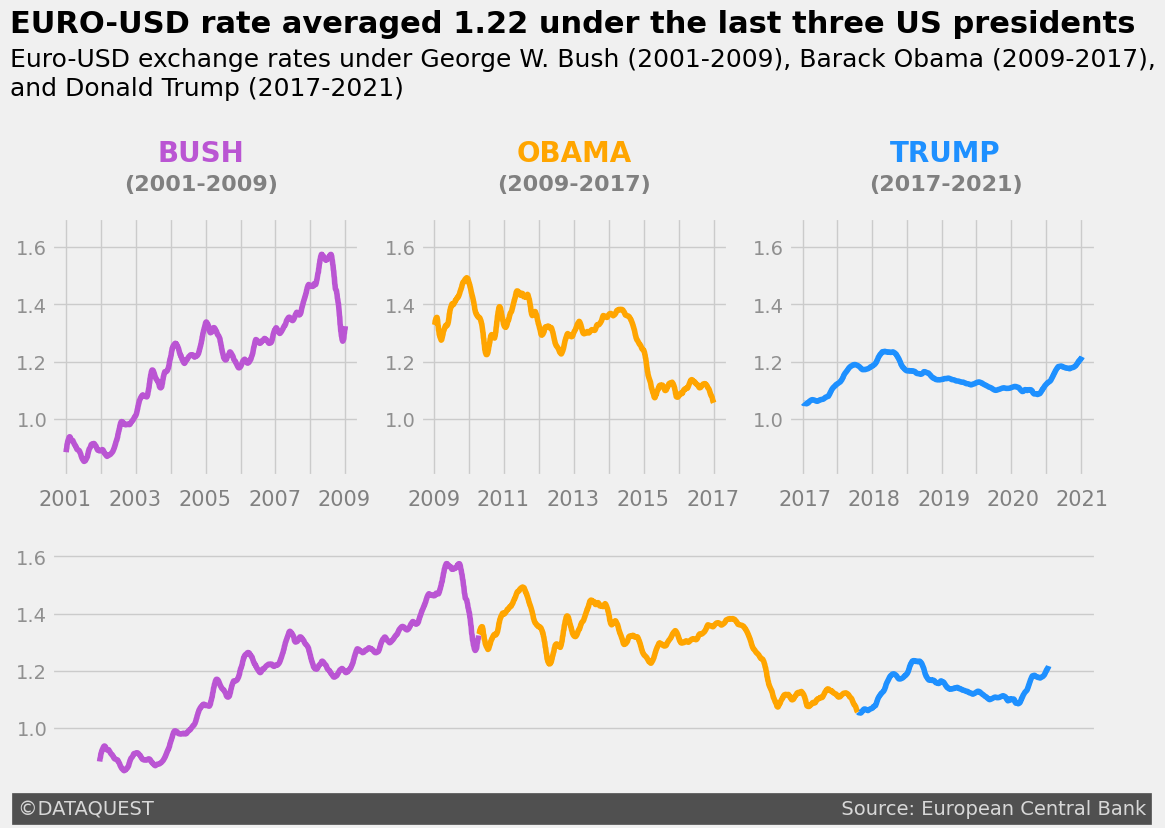

In [10]:
bush = euro_to_dollar[euro_to_dollar['Time'].dt.year.between(2001,2008)]
obama = euro_to_dollar[euro_to_dollar['Time'].dt.year.between(2009,2016)]
trump = euro_to_dollar[euro_to_dollar['Time'].dt.year.between(2017,2021)]


# Set up plots and draw graphs
fig = plt.figure(figsize=(12, 7))

ax1 = fig.add_subplot(2, 3, 1)
ax2 = fig.add_subplot(2, 3, 2)
ax3 = fig.add_subplot(2, 3, 3)
ax4 = fig.add_subplot(2, 1, 2)

ax1.plot(bush['Time'], bush['rolling_mean'], color='mediumorchid')
ax2.plot(obama['Time'], obama['rolling_mean'], color='orange')
ax3.plot(trump['Time'], trump['rolling_mean'], color='dodgerblue')

ax4.plot(bush['Time'], bush['rolling_mean'], color='mediumorchid')
ax4.plot(obama['Time'], obama['rolling_mean'], color='orange')
ax4.plot(trump['Time'], trump['rolling_mean'], color='dodgerblue')


# Set x and y axes, grid, and labels
axes = [ax1, ax2, ax3, ax4]
for ax in axes:
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_yticks([1.0, 1.2, 1.4, 1.6])
    ax.set_yticklabels(['1.0', '1.2', '1.4', '1.6'], alpha=0.4)
    ax.set_ylim([0.8, 1.7])

ax4.grid(axis='x')

x = 730200
for year in ['2001', '2003', '2005', '2007', '2009']:
    ax1.text(x, 0.7, year, color='grey', fontsize=15)
    x += 730

x = 733122
for year in ['2009', '2011', '2013', '2015', '2017']:
    ax2.text(x, 0.7, year, color='grey', fontsize=15)
    x += 730

x = 736200
for year in ['2017', '2018', '2019', '2020', '2021']:
    ax3.text(x, 0.7, year, color='grey', fontsize=15)
    x += 365

    
# Add main title and signature 
ax1.text(729900, 2.35,'EURO-USD rate averaged 1.22 under the last three US presidents',
        fontsize=22, weight='bold')
ax1.text(729900, 2.23, 'Euro-USD exchange rates under George W. Bush (2001-2009), Barack Obama (2009-2017),',
        fontsize=18)
ax1.text(729900, 2.13, 'and Donald Trump (2017-2021)',
        fontsize=18)

ax4.text(729855, 0.7, '©DATAQUEST' + ' '*110 + 'Source: European Central Bank',
       color='#D8D8D8', backgroundcolor='#505050')


#Add titles to top three graphs
ax1.text(731900, 1.9, 'BUSH', color='mediumorchid', fontsize=20,
         weight='bold', ha='center')
ax1.text(731900, 1.8, '(2001-2009)', color='grey', fontsize=16,
         weight='bold', ha='center')

ax2.text(734870, 1.9, 'OBAMA', color='orange', fontsize=20,
         weight='bold', ha='center')
ax2.text(734870, 1.8, '(2009-2017)', color='grey', fontsize=16,
         weight='bold', ha='center')
    
ax3.text(737080, 1.9, 'TRUMP', color='dodgerblue', fontsize=20,
         weight='bold', ha='center')
ax3.text(737080, 1.8, '(2017-2021)', color='grey', fontsize=16,
         weight='bold', ha='center')


plt.show()
